<a href="https://colab.research.google.com/github/joshhmzhang/Capstone-Project-Notebook/blob/master/Capstone_Where_to_open_a_Chinese_Restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Where to open a new Chinese Restaurant in Central Toronto
### -- Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Source](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Michine Learning](#michine)
* [Results and Discussion](#results)


## 1 Introdiction: Business Problem<a name="introduction"></a>

As the provincial capital of Ontario and the most populous city in Canada, Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.

In this project, we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening a Chinese restaurant in Toronto, Canada. Since there are lots of restaurants in Toronto, we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no Chinese restaurants in the vicinity. We would also prefer locations as close to the city centre as possible, assuming that the first two conditions are met.

We will use our data science powers to generate a few most promising neighbourhoods based on this criterion. Advantages of each area will then be clearly expressed so that the best possible final location can be chosen by stakeholders.



## 2 Data Source<a name="data"></a>

To solve the problem, we will need to find out:
* number of existing restaurants in the neighborhood (any type of restaurant)
* number of and distance to Chinese restaurants in the neighborhood, if any


Following data sources will be needed to extract/generate the required information:
* The postal code and name of the neibourhood in Toronto from **wikipedia** (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) 
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of each neighbourhood center will be obtained from http://cocl.us/Geospatial_data

### 2.1 Import library and load the data table from wikipedia

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[0]
df_table = pd.read_html(str(table))
df=pd.DataFrame(df_table[0])
#df.columns = ['PostalCode', 'Borough', 'Neighborhood'] 

In [0]:
df.shape

(20, 9)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park / Ontario Provincial Government,M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


### 2.2 Clean Data

### The Table need to be cleaned

In [0]:
s0=pd.Series(df.iloc[0])
s1=pd.Series(df.iloc[1])
s2=pd.Series(df.iloc[2])
s3=pd.Series(df.iloc[3])
s4=pd.Series(df.iloc[4])
s5=pd.Series(df.iloc[5])
s6=pd.Series(df.iloc[6])
s7=pd.Series(df.iloc[7])
s8=pd.Series(df.iloc[8])
s9=pd.Series(df.iloc[9])
s10=pd.Series(df.iloc[10])
s11=pd.Series(df.iloc[11])
s12=pd.Series(df.iloc[12])
s13=pd.Series(df.iloc[13])
s14=pd.Series(df.iloc[14])
s15=pd.Series(df.iloc[15])
s16=pd.Series(df.iloc[16])
s17=pd.Series(df.iloc[17])
s18=pd.Series(df.iloc[18])
s19=pd.Series(df.iloc[19])


df1=pd.DataFrame(pd.concat([s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19],ignore_index=True))

In [0]:
df1

,0
0,M1ANot assigned
1,M2ANot assigned
2,M3ANorth York(Parkwoods)
3,M4ANorth York(Victoria Village)
4,M5ADowntown Toronto(Regent Park / Harbourfront)
...,...
175,M5ZNot assigned
176,M6ZNot assigned
177,M7ZNot assigned
178,M8ZEtobicoke(Mimico NW / The Queensway West / ...


In [0]:
df1['PostalCode']=df1[0].str[:3]
df1[0]=df1[0].str[3:]

In [0]:
df1[0]

0                                           Not assigned
1                                           Not assigned
2                                  North York(Parkwoods)
3                           North York(Victoria Village)
4           Downtown Toronto(Regent Park / Harbourfront)
                             ...                        
175                                         Not assigned
176                                         Not assigned
177                                         Not assigned
178    Etobicoke(Mimico NW / The Queensway West / Sou...
179                                         Not assigned
Name: 0, Length: 180, dtype: object

In [0]:
df1['Borough']=df1[0].str.split('(').str[0]
df1['Neighborhood']=df1[0].str.split('(').str[1]

In [0]:
df1['Neighborhood']=df1['Neighborhood'].str.split(')').str[0]

In [0]:
df=df1.drop([0],1)

df


,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
...,...,...,...
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN
178,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...


In [0]:
df=df[df.Borough != 'Not assigned']

df.head(5)

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Queen's Park / Ontario Provincial Government,NaN


### Replace 'NaN' from Neighbourhood with Borough 

In [0]:
## If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
df.Neighborhood = np.where(df.Neighborhood.isnull(),df.Borough,df.Neighborhood)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Queen's Park / Ontario Provincial Government,Queen's Park / Ontario Provincial Government
...,...,...,...
160,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
169,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...


In [0]:
print('There are {} Borough and {} Neighborhood in Toronto'.format(len(df.Borough.unique()),len(df.Neighborhood.unique())))

There are 15 Borough and 98 Neighborhood in Toronto


### Reformat the data: Combine neighbourhood with same postal code

In [0]:
df=df.groupby(['PostalCode','Borough'],sort=False)['Neighborhood'].apply(','.join).reset_index()
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Queen's Park / Ontario Provincial Government,Queen's Park / Ontario Provincial Government


In [0]:
df.shape

(103, 3)

### 2.3 Import the latitude and the longitude

In [0]:
location=pd.read_csv('http://cocl.us/Geospatial_data')
location.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [0]:
location.rename(columns={'Postal Code':'PostalCode'},inplace=True)

###  Merge two dataframe

In [0]:
df=pd.merge(left=df,right=location,on='PostalCode')

In [0]:
df.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Queen's Park / Ontario Provincial Government,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,Parkview Hill / Woodbine Gardens,43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [0]:
df.Borough.unique()

array(['North York', 'Downtown Toronto',
       "Queen's Park / Ontario Provincial Government", 'Etobicoke',
       'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto',
       'East YorkEast Toronto', 'Central Toronto',
       'MississaugaCanada Post Gateway Processing Centre',
       'Downtown TorontoStn A PO Boxes25 The Esplanade',
       'EtobicokeNorthwest',
       'East TorontoBusiness reply mail Processing Centre969 Eastern'],
      dtype=object)

### Extract Central Toronto only

In [0]:
df_to=df[df.Borough.str.contains('Toronto')].reset_index(drop=True)
df_to.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


### 2.4 Extract vanues from Foursquare

Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in our list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Chinese restaurant' category, as we need info on Chinese restaurants in the neighborhood.

Foursquare credentials are defined in hidden cell bellow.

In [0]:
# @hidden_cell
# Define Foursquare Credentials and Version
CLIENT_ID = 'TTL1GCIESCUJ3ZENTWFVYQTAJP1MJAUZXD305GKZ0N5APD31' # your Foursquare ID
CLIENT_SECRET = 'UGOF0CSHVKI5PXXS1AYDKGXKLPOXB45O335QW0K1WPDTIRIS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [0]:
#the top 100 venues that are in Toronto within a radius of 500 meters.
radius = 500
limit = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
toronto_venues = getNearbyVenues(names=df_to['Neighborhood'],
                                 latitudes=df_to['Latitude'],
                                 longitudes=df_to['Longitude']
                                )

Regent Park / Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond / Adelaide / King
Dufferin / Dovercourt Village
The Danforth East
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
The Danforth West / Riverdale
Toronto Dominion Centre / Design Exchange
Brockton / Parkdale Village / Exhibition Place
India Bazaar / The Beaches West
Commerce Court / Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park / The Junction South
North Toronto West
The Annex / North Midtown / Yorkville
Parkdale / Roncesvalles
Davisville
University of Toronto / Harbord
Runnymede / Swansea
Moore Park / Summerhill East
Kensington Market / Chinatown / Grange Park
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Rosedale
Enclave of M5E
St. James

In [0]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park / Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park / Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park / Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park / Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Regent Park / Harbourfront,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [0]:
toronto_venues.shape

(1688, 7)

## 3 Methodology <a name="methodology"></a>

First, the explortory analysis will be conducted to reveal the general information like how many vanues in each neibourhood and the desity of the resturant, We will need to detect areas that have low restaurant density, particularly those with low number of Chinese restaurants. 

Second step in our analysis will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** with Michine Learning. For instance, the area with lots venues but less Chinese restaurants or Asian restaurants. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods which should be a starting point for final exploration and search for optimal venue location by stakeholders.




## 4. Analysis <a name="analysis"></a>


### 4.1 Venues information in each neigbourhood

In [0]:
print("There are {} neighcourhood in Central Toronto".format(len(toronto_venues.Neighborhood.unique())))

There are 39 neighcourhood in Central Toronto


In [0]:
print("There are {} unique categories of venues in Toronto".format(len(toronto_venues['Venue Category'].unique())))


There are 240 unique categories of venues in Toronto


In [0]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot = toronto_onehot.rename(columns={"Neighborhood": "Neighborhod"})
toronto_onehot.insert(0, 'Neighborhood', toronto_venues['Neighborhood'])
toronto_onehot.head(10)

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,...,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
toronto_grouped = toronto_onehot.groupby("Neighborhood").mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,...,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.0,0.0,0.017857,0.000000,0.0,0.0,0.000000,0.0,0.017857,0.000000,0.017857,0.035714,0.0,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.017857,0.0,0.0000,0.000000,0.0000,0.0,0.017857,0.0,0.000000,0.0,...,0.035714,0.0,0.0,0.017857,0.0,0.0,0.0,0.000000,0.0,0.017857,0.0,0.000000,0.0,0.017857,0.0,0.0,0.000000,0.0,0.017857,0.0,0.0,0.0,0.000000,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,Brockton / Parkdale Village / Exhibition Place,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.041667,0.0,0.041667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.0,0.083333,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.041667,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,CN Tower / King and Spadina / Railway Lands / ...,0.0,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0625,0.000000,0.0625,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,Central Bay Street,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.012048,0.0,0.0,0.000000,0.012048,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.012048,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.012048,0.0000,0.0,0.000000,0.0,0.024096,0.0,...,0.012048,0.0,0.0,0.000000,0.0,0.0,0.0,0.012048,0.0,0.000000,0.0,0.000000,0.0,0.012048,0.0,0.0,0.012048,0.0,0.000000,0.0,0.0,0.0,0.012048,0.0,0.024096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,0.0,0.0,0.012048,0.0,0.0,0.0,0.012048
4,Christie,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.055556,0.0,0.000000,0.055556,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


### Top 10 common venues in each neigourhood

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Farmers Market,Beer Bar,Seafood Restaurant,Museum
1,Brockton / Parkdale Village / Exhibition Place,Nightclub,Coffee Shop,Café,Breakfast Spot,Gym / Fitness Center,Bakery,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
2,CN Tower / King and Spadina / Railway Lands / ...,Airport Lounge,Airport Service,Airport Terminal,Plane,Airport,Airport Food Court,Airport Gate,Sculpture Garden,Harbor / Marina,Boutique
3,Central Bay Street,Coffee Shop,Italian Restaurant,Japanese Restaurant,Burger Joint,Ice Cream Shop,Sandwich Place,Gym / Fitness Center,Department Store,Restaurant,Middle Eastern Restaurant
4,Christie,Grocery Store,Café,Park,Gas Station,Italian Restaurant,Restaurant,Diner,Baby Store,Athletics & Sports,Nightclub
5,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Gastropub,Hotel,Pub,Bubble Tea Shop,Men's Store
6,Commerce Court / Victoria Hotel,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Deli / Bodega,Japanese Restaurant,Italian Restaurant,Gastropub
7,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Gym,Sushi Restaurant,Coffee Shop,Café,Italian Restaurant,Asian Restaurant,Japanese Restaurant
8,Davisville North,Gym,Department Store,Park,Breakfast Spot,Sandwich Place,Hotel,Food & Drink Shop,Dumpling Restaurant,Doner Restaurant,Donut Shop
9,Dufferin / Dovercourt Village,Bakery,Pharmacy,Gym / Fitness Center,Grocery Store,Furniture / Home Store,Fast Food Restaurant,Middle Eastern Restaurant,Music Venue,Park,Pool


 ### The number of venues in each neigourhood

In [0]:
print('The number of popular venues in each Neighbourhood are as follows:')
toronto_vnum=toronto_venues.groupby('Neighborhood')['Venue'].count().reset_index().sort_values('Venue', ascending=False).\
                rename(columns={'Venue':'Num_Venues'})
toronto_vnum

The number of popular venues in each Neighbourhood are as follows:


,Neighborhood,Num_Venues
37,Toronto Dominion Centre / Design Exchange,100
25,Richmond / Adelaide / King,100
6,Commerce Court / Victoria Hotel,100
15,Harbourfront East / Union Station / Toronto Is...,100
14,"Garden District, Ryerson",100
12,First Canadian Place / Underground city,100
29,St. James Town,100
11,Enclave of M5E,95
18,Kensington Market / Chinatown / Grange Park,87
5,Church and Wellesley,87


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

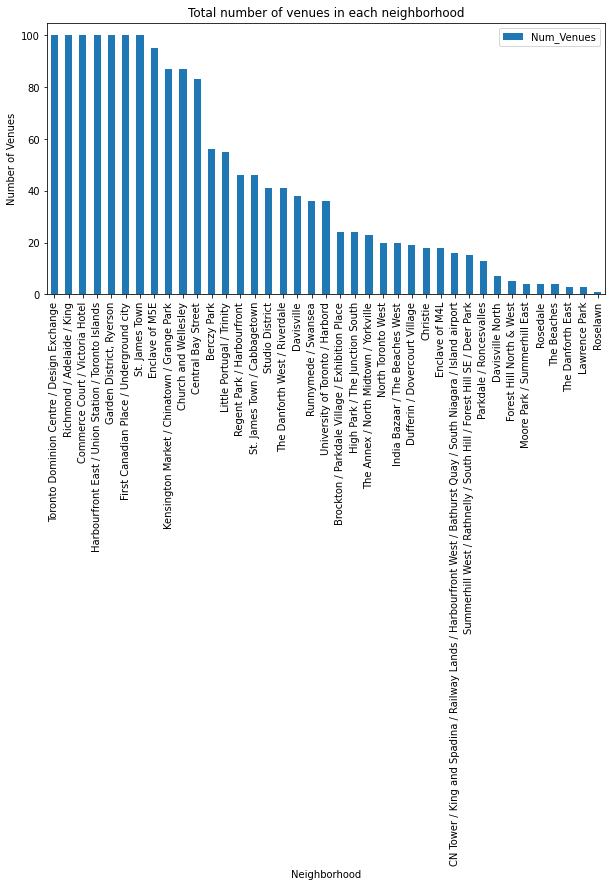

In [0]:
toronto_vnum.set_index('Neighborhood').plot.bar(figsize=(10, 5))
plt.title('Total number of venues in each neighborhood')
plt.ylabel('Number of Venues')
plt.xlabel('Neighborhood')
plt.xticks(rotation=90)

### Top 5 venues in the neigourhood with more than 80 category of venues 

In [0]:
toronto_grouped.head(2)

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,...,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.017857,0.035714,0.0,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,...,0.035714,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.000000,0.0,0.017857,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brockton / Parkdale Village / Exhibition Place,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.041667,0.0,0.041667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
toronto_vnum_80=toronto_vnum[toronto_vnum.Num_Venues>80]

In [0]:
df_group_80=toronto_grouped.merge(toronto_vnum_80,on='Neighborhood').sort_values('Num_Venues',ascending=False).drop('Num_Venues',1)


In [0]:
df_group_80

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,...,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
2,Commerce Court / Victoria Hotel,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.000000,0.00,0.010000,0.000000,0.000000,0.01,0.0,0.0,0.000000,0.0,0.000000,0.020000,0.00,0.020000,0.00,0.000000,0.0,0.000000,0.020000,0.0,0.000000,0.000000,0.0,0.0,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.01,...,0.030000,0.0,0.00,0.010000,0.0,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.0,0.0,0.010000,0.000000,0.00,0.000000,0.0,0.010000,0.0,0.00,0.0,0.010000,0.0,0.020000,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.020000,0.00,0.000000,0.010000,0.000000,0.000000,0.00,0.000000
4,First Canadian Place / Underground city,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.030000,0.000000,0.00,0.010000,0.000000,0.000000,0.03,0.0,0.0,0.000000,0.0,0.000000,0.020000,0.00,0.020000,0.00,0.000000,0.0,0.000000,0.020000,0.0,0.000000,0.000000,0.0,0.0,0.010000,0.000000,0.01,0.000000,0.000000,0.000000,0.01,...,0.030000,0.0,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.0,0.0,0.030000,0.000000,0.00,0.010000,0.0,0.000000,0.0,0.00,0.0,0.020000,0.0,0.020000,0.010000,0.000000,0.0,0.00,0.0,0.01,0.0,0.010000,0.00,0.000000,0.010000,0.000000,0.000000,0.00,0.000000
5,"Garden District, Ryerson",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000,0.010000,0.01,0.010000,0.00,0.000000,0.0,0.000000,0.010000,0.0,0.000000,0.000000,0.0,0.0,0.020000,0.000000,0.00,0.000000,0.000000,0.020000,0.00,...,0.010000,0.0,0.01,0.010000,0.0,0.00,0.010000,0.010000,0.00,0.010000,0.000000,0.0,0.0,0.010000,0.000000,0.00,0.010000,0.0,0.000000,0.0,0.01,0.0,0.010000,0.0,0.010000,0.020000,0.000000,0.0,0.01,0.0,0.00,0.0,0.000000,0.01,0.010000,0.010000,0.000000,0.000000,0.00,0.000000
6,Harbourfront East / Union Station / Toronto Is...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.05,0.010000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000,0.020000,0.00,0.020000,0.02,0.010000,0.0,0.000000,0.010000,0.0,0.000000,0.010000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.030000,0.010000,0.00,...,0.010000,0.0,0.00,0.000000,0.0,0.01,0.000000,0.000000,0.00,0.030000,0.020000,0.0,0.0,0.010000,0.000000,0.01,0.010000,0.0,0.000000,0.0,0.00,0.0,0.010000,0.0,0.000000,0.010000,0.000000,0.0,0.00,0.0,0.01,0.0,0.010000,0.00,0.000000,0.010000,0.000000,0.000000,0.00,0.000000
8,Richmond / Adelaide / King,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.020000,0.000000,0.00,0.010000,0.010000,0.000000,0.02,0.0,0.0,0.000000,0.0,0.000000,0.020000,0.00,0.030000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.020000,0.000000,0.01,0.020000,0.000000,0.000000,0.01,...,0.020000,0.0,0.00,0.000000,0.0,0.00,0.010000,0.000000,0.01,0.000000,0.000000,0.0,0.0,0.030000,0.000000,0.00,0.020000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.040000,0.010000,0.000000,0.0,0.00,0.0,0.00,0.0,0.020000,0.00,0.000000,0.010000,0.000000,0.000000,0.01,0.000000
9,St. James Town,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.020

In [0]:
df_group_80.T.reset_index()

,index,2,4,5,6,8,9,10,3,1,7,0
0,Neighborhood,Commerce Court / Victoria Hotel,First Canadian Place / Underground city,"Garden District, Ryerson",Harbourfront East / Union Station / Toronto Is...,Richmond / Adelaide / King,St. James Town,Toronto Dominion Centre / Design Exchange,Enclave of M5E,Church and Wellesley,Kensington Market / Chinatown / Grange Park,Central Bay Street
1,Afghan Restaurant,0,0,0,0,0,0,0,0,0.0114943,0,0
2,Airport,0,0,0,0,0,0,0,0,0,0,0
3,Airport Food Court,0,0,0,0,0,0,0,0,0,0,0
4,Airport Gate,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
236,Wine Bar,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0,0,0.0114943,0.0120482
237,Wine Shop,0,0,0,0,0,0,0,0,0.0114943,0,0
238,Wings Joint,0,0,0,0,0,0,0,0,0.0114943,0,0
239,Women's Store,0,0,0,0,0.01,0,0,0,0,0,0


In [0]:
num_top_venues = 5

for hood in df_group_80['Neighborhood']:
    print("----"+hood+"----")
    temp = df_group_80[df_group_80['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Commerce Court / Victoria Hotel----
                 venue  freq
0          Coffee Shop  0.11
1                 Café  0.07
2           Restaurant  0.07
3                Hotel  0.05
4  American Restaurant  0.04


----First Canadian Place / Underground city----
         venue  freq
0  Coffee Shop  0.12
1         Café  0.07
2   Restaurant  0.06
3    Gastropub  0.03
4        Hotel  0.03


----Garden District, Ryerson----
                       venue  freq
0                Coffee Shop  0.10
1             Clothing Store  0.08
2                       Café  0.03
3        Japanese Restaurant  0.03
4  Middle Eastern Restaurant  0.03


----Harbourfront East / Union Station / Toronto Islands----
                venue  freq
0         Coffee Shop  0.12
1            Aquarium  0.05
2               Hotel  0.04
3                Café  0.04
4  Italian Restaurant  0.04


----Richmond / Adelaide / King----
             venue  freq
0      Coffee Shop  0.07
1       Restaurant  0.05
2             Café  0.0

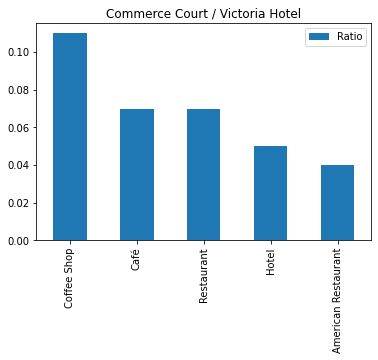

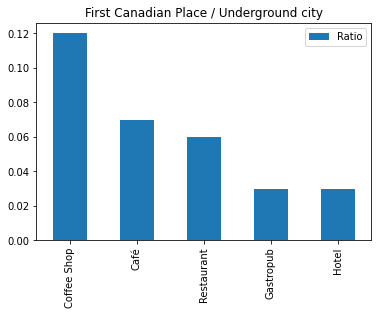

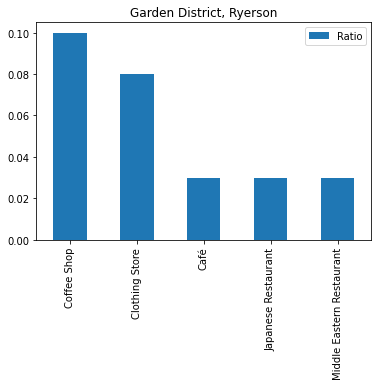

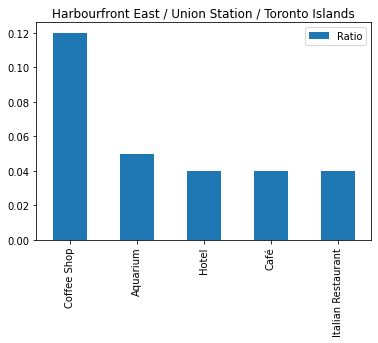

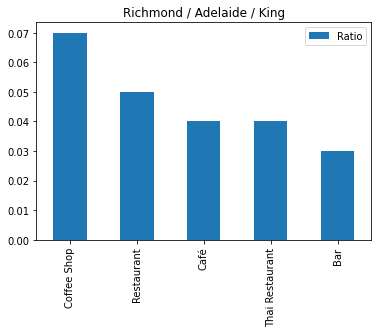

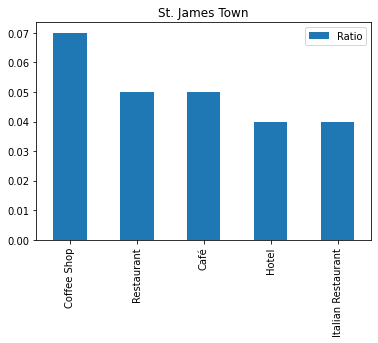

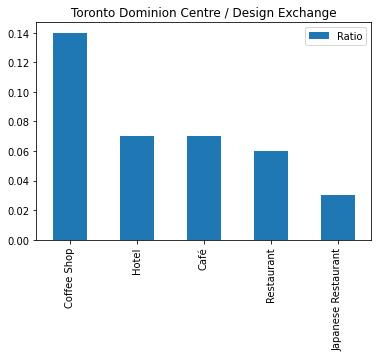

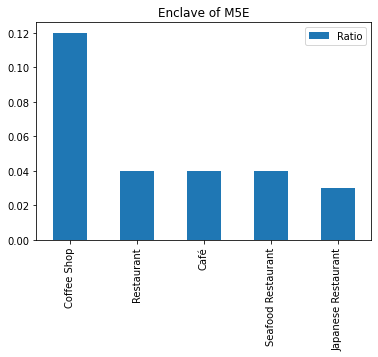

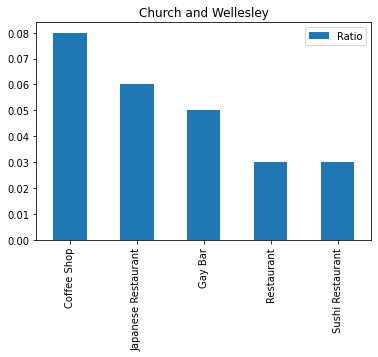

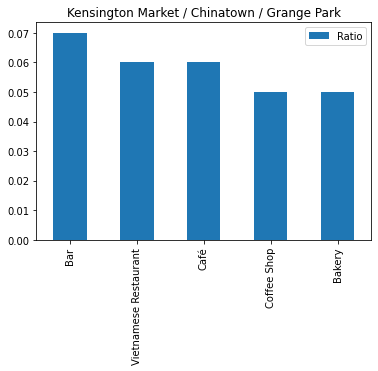

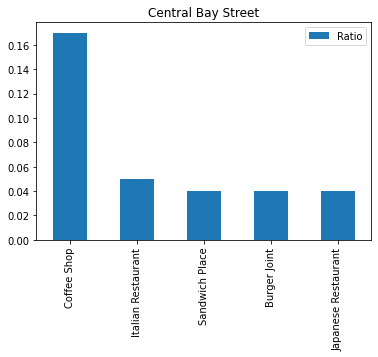

In [0]:
for hood in df_group_80['Neighborhood']:
    temp = df_group_80[df_group_80['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    temp.sort_values('freq', ascending=False).set_index('venue').head(num_top_venues).plot.bar()
    plt.title(hood)
    plt.xlabel('')
    plt.legend(['Ratio'])


#### * It is clear that the ares with more than 80 venue categories have the coffee shop, resturant and cafe as the top ones. These neighborhood may attract the most turists 

### 4.2 Resturant in each neighbourhood

In [0]:
toronto_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park / Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park / Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park / Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park / Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Regent Park / Harbourfront,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [0]:
#how many resusturants in each neighbourhood
print('The number of resturant in each neighbourhood is as below:')
totonto_res=toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant')].groupby('Neighborhood')['Venue Latitude'].\
    nunique().reset_index().sort_values('Venue Latitude',ascending=False).rename(columns={'Venue Latitude':'Num_Resturants'})
totonto_res

The number of resturant in each neighbourhood is as below:


,Neighborhood,Num_Resturants
5,Commerce Court / Victoria Hotel,30
10,First Canadian Place / Underground city,30
16,Kensington Market / Chinatown / Grange Park,29
22,Richmond / Adelaide / King,29
4,Church and Wellesley,28
2,Central Bay Street,26
24,St. James Town,26
30,Toronto Dominion Centre / Design Exchange,25
12,"Garden District, Ryerson",23
9,Enclave of M5E,20


In [0]:
#how many chinese resturant in each Neighborhood
print('The number of chinese resturant in each neighbourhood is as below:')
toronto_ch_res=toronto_venues[toronto_venues['Venue Category'].str.contains('Chinese Restaurant')].groupby('Neighborhood')['Venue Latitude'].\
    nunique().reset_index().sort_values('Venue Latitude',ascending=False).rename(columns={'Venue Latitude':'Num_Chinese Resturants'})
toronto_ch_res

The number of chinese resturant in each neighbourhood is as below:


,Neighborhood,Num_Chinese Resturants
0,Central Bay Street,2
4,Kensington Market / Chinatown / Grange Park,2
1,Church and Wellesley,1
2,"Garden District, Ryerson",1
3,Harbourfront East / Union Station / Toronto Is...,1
5,North Toronto West,1
6,St. James Town / Cabbagetown,1
7,Toronto Dominion Centre / Design Exchange,1
8,University of Toronto / Harbord,1


### Which areas do not have resturant

In [0]:
toronto_nei_nonres=pd.merge(toronto_vnum,\
                              totonto_res[['Neighborhood','Num_Resturants']],\
                              on='Neighborhood',how='left')

In [0]:
toronto_nei_nonres=toronto_nei_nonres[toronto_nei_nonres['Num_Resturants'].isnull()]
toronto_nei_nonres

,Neighborhood,Num_Venues,Num_Resturants
28,CN Tower / King and Spadina / Railway Lands / ...,16,NaN
31,Davisville North,7,NaN
34,Rosedale,4,NaN
35,The Beaches,4,NaN
36,The Danforth East,3,NaN
37,Lawrence Park,3,NaN
38,Roselawn,1,NaN


In [0]:
print('There are {0:.0%} neighborhood in Central Toronto do not have the restaurant'.\
      format(toronto_nei_nonres.shape[0]/toronto_vnum.shape[0]))

There are 18% neighborhood in Central Toronto do not have the resturant


#### * It makes sense that there is no resturant in the neiborhood with not enough venues to attract more people 

### Which neighbourhoods do not have Chinese Resturant 

In [0]:
toronto_nonch_res=pd.merge(toronto_vnum,\
                              toronto_ch_res[['Neighborhood','Num_Chinese Resturants']],\
                              on='Neighborhood',how='left')

In [0]:
toronto_nonch_res=toronto_nonch_res[toronto_nonch_res['Num_Chinese Resturants'].isnull()]
toronto_nonch_res

,Neighborhood,Num_Venues,Num_Chinese Resturants
1,Richmond / Adelaide / King,100,NaN
2,Commerce Court / Victoria Hotel,100,NaN
5,First Canadian Place / Underground city,100,NaN
6,St. James Town,100,NaN
7,Enclave of M5E,95,NaN
11,Berczy Park,56,NaN
12,Little Portugal / Trinity,55,NaN
13,Regent Park / Harbourfront,46,NaN
15,Studio District,41,NaN
16,The Danforth West / Riverdale,41,NaN


In [0]:
print('There are {0:.0%} neighborhood in Central Toronto do not have the Chinese restaurant'.\
      format(toronto_nonch_res.shape[0]/toronto_vnum.shape[0]))

There are 77% neighborhood in Central Toronto do not have the Chinese resturant


#### It is surprising that there are 7 areas with more than 50 venues donot have even one Chinese Restaurant

### Which neighbourhoods have Chinese Resturant 

In [0]:
toronto_nei_chres=toronto_vnum.merge(totonto_res,on='Neighborhood').merge(toronto_ch_res,on='Neighborhood')
toronto_nei_chres

,Neighborhood,Num_Venues,Num_Resturants,Num_Chinese Resturants
0,Toronto Dominion Centre / Design Exchange,100,25,1
1,Harbourfront East / Union Station / Toronto Is...,100,15,1
2,"Garden District, Ryerson",100,23,1
3,Kensington Market / Chinatown / Grange Park,87,29,2
4,Church and Wellesley,87,28,1
5,Central Bay Street,83,26,2
6,St. James Town / Cabbagetown,46,11,1
7,University of Toronto / Harbord,36,10,1
8,North Toronto West,20,4,1


### Which neighbourhoods have asian Resturant

In [0]:
totonto_asian_res=toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant')]['Venue Category'].unique()

In [0]:
totonto_asian_res

array(['Restaurant', 'French Restaurant', 'Mexican Restaurant',
       'Asian Restaurant', 'Ramen Restaurant', 'Thai Restaurant',
       'American Restaurant', 'Japanese Restaurant', 'Sushi Restaurant',
       'Fast Food Restaurant', 'Middle Eastern Restaurant',
       'Modern European Restaurant', 'Italian Restaurant',
       'Seafood Restaurant', 'Chinese Restaurant', 'Ethiopian Restaurant',
       'Vietnamese Restaurant', 'New American Restaurant',
       'Latin American Restaurant', 'Vegetarian / Vegan Restaurant',
       'Korean Restaurant', 'German Restaurant',
       'Comfort Food Restaurant', 'Greek Restaurant',
       'Eastern European Restaurant', 'Portuguese Restaurant',
       'Indian Restaurant', 'Falafel Restaurant', 'Colombian Restaurant',
       'Brazilian Restaurant', 'Gluten-free Restaurant',
       'Mediterranean Restaurant', 'Cuban Restaurant', 'Tapas Restaurant',
       'Caribbean Restaurant', 'Cajun / Creole Restaurant',
       'Belgian Restaurant', 'Dumpling Rest

#### The areas taht donot have Chinese Resturants may have similar Asian Resturant 
"Asian Restaurant,
Dumpling Restaurant,
Hotpot Restaurant,
Dim Sum Restaurant,
Taiwanese Restaurant"

In [0]:
totonto_asian_res=toronto_venues[(toronto_venues['Venue Category']=='Asian Restaurant') | (toronto_venues['Venue Category']=='Dumpling Restaurant')\
                                 | (toronto_venues['Venue Category']=='Hotpot Restaurant') | (toronto_venues['Venue Category']=='Dim Sum Restaurant')\
                                 | (toronto_venues['Venue Category']=='Taiwanese Restaurant')][['Neighborhood','Venue Category']]
totonto_asian_res_num=totonto_asian_res.groupby('Neighborhood',sort=False)['Venue Category'].count().reset_index()
totonto_asian_res=totonto_asian_res.groupby('Neighborhood',sort=False)['Venue Category'].apply(','.join).reset_index()
totonto_asian_res=totonto_asian_res.merge(totonto_asian_res_num,on='Neighborhood')
totonto_asian_res.rename(columns={'Venue Category_x':'Restaurant Type','Venue Category_y':'Restaurant Num'},inplace=True)
totonto_asian_res

,Neighborhood,Restaurant Type,Restaurant Num
0,Regent Park / Harbourfront,Asian Restaurant,1
1,St. James Town,Asian Restaurant,1
2,Richmond / Adelaide / King,"Asian Restaurant,Asian Restaurant",2
3,Little Portugal / Trinity,"Asian Restaurant,Asian Restaurant,Asian Restau...",3
4,Toronto Dominion Centre / Design Exchange,Asian Restaurant,1
5,Commerce Court / Victoria Hotel,Asian Restaurant,1
6,Davisville,Asian Restaurant,1
7,Kensington Market / Chinatown / Grange Park,"Dumpling Restaurant,Dumpling Restaurant,Hotpot...",4
8,St. James Town / Cabbagetown,Taiwanese Restaurant,1
9,First Canadian Place / Underground city,"Asian Restaurant,Asian Restaurant,Asian Restau...",3


In [0]:
toronto_nonch_asires=toronto_nonch_res.merge(totonto_asian_res, on='Neighborhood',how="left")     

In [0]:
toronto_nonch_asires=toronto_nonch_asires[toronto_nonch_asires.Num_Venues>50]

In [0]:
toronto_nonch_asires.rename(columns={'Restaurant Num':'Num_Asian Resturants','Restaurant Type':'Asian Resturants Type'},inplace=True)
toronto_nonch_asires

,Neighborhood,Num_Venues,Num_Chinese Resturants,Asian Resturants Type,Num_Asian Resturants
0,Richmond / Adelaide / King,100,NaN,"Asian Restaurant,Asian Restaurant",2.0
1,Commerce Court / Victoria Hotel,100,NaN,Asian Restaurant,1.0
2,First Canadian Place / Underground city,100,NaN,"Asian Restaurant,Asian Restaurant,Asian Restau...",3.0
3,St. James Town,100,NaN,Asian Restaurant,1.0
4,Enclave of M5E,95,NaN,NaN,NaN
5,Berczy Park,56,NaN,NaN,NaN
6,Little Portugal / Trinity,55,NaN,"Asian Restaurant,Asian Restaurant,Asian Restau...",3.0


### * Among the neiborhoods that have more than 50 venues,'Enclave of M5E' and 'Berczy Park' donot have any asian restaurant or chinese Restaurants; 'St. James Town' and 'Commerce Court / Victoria Hotel' only have one Asian restaurant. so these four neiborhood could be the top choices of the location

### The resturant density for the four choices

In [0]:
res_dens=totonto_res[(totonto_res.Neighborhood=='St. James Town')| (totonto_res.Neighborhood=='Enclave of M5E') | \
             (totonto_res.Neighborhood=='Berczy Park') | (totonto_res.Neighborhood=='Commerce Court / Victoria Hotel')].merge(toronto_nonch_asires[['Neighborhood',	'Num_Venues']],on='Neighborhood')
res_dens['Density']=res_dens.Num_Resturants/res_dens.Num_Venues
res_dens

,Neighborhood,Num_Resturants,Num_Venues,Density
0,Commerce Court / Victoria Hotel,30,100,0.300000
1,St. James Town,26,100,0.260000
2,Enclave of M5E,20,95,0.210526
3,Berczy Park,11,56,0.196429


Text(0.5, 0, '')

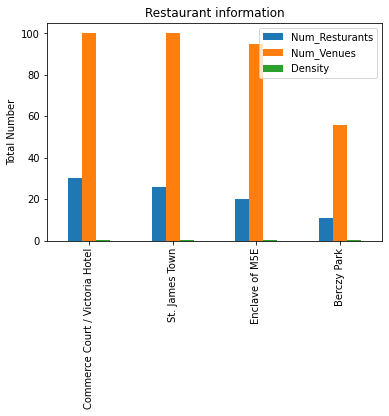

In [0]:
res_dens.set_index('Neighborhood').plot.bar()
plt.title('Restaurant information')
plt.ylabel('Total Number')
plt.xlabel('')

Text(0.5, 1.0, 'Number of Restaurant VS Number of Venues Categories')

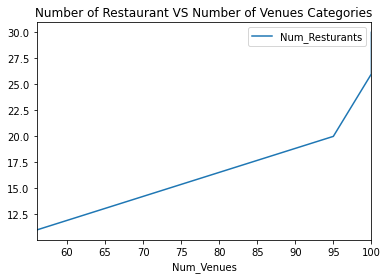

In [0]:
res_dens.plot.line(y='Num_Resturants',x='Num_Venues')
plt.title('Number of Restaurant VS Number of Venues Categories')

## 5. Machine Learning <a name="michine"></a>

### 5.1 Unsupervised learning to cluster similar neighbourhood -- KMeans Clustering

In [0]:
#we are only interest in the neiborhood with more than 50 venues
toronto_cluster=toronto_grouped.merge(toronto_vnum[toronto_vnum.Num_Venues>50],on='Neighborhood')
toronto_cluster


,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,...,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Num_Venues
0,Berczy Park,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.0,0.0,0.017857,0.0,0.017857,0.035714,0.00,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.017857,0.0,0.0,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.00,...,0.0,0.00,0.017857,0.0,0.00,0.000000,0.000000,0.00,0.017857,0.000000,0.0,0.0,0.017857,0.000000,0.00,0.000000,0.0,0.017857,0.0,0.00,0.000000,0.000000,0.0,0.017857,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.017857,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,56
1,Central Bay Street,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,0.000000,0.00,0.000000,0.012048,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.012048,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.012048,0.000000,0.00,0.000000,0.000000,0.024096,0.00,...,0.0,0.00,0.000000,0.0,0.00,0.000000,0.012048,0.00,0.000000,0.000000,0.0,0.0,0.012048,0.000000,0.00,0.012048,0.0,0.000000,0.0,0.00,0.000000,0.012048,0.0,0.024096,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.012048,0.00,0.000000,0.012048,0.000000,0.000000,0.00,0.012048,83
2,Church and Wellesley,0.011494,0.0,0.0,0.0,0.0,0.0,0.0,0.011494,0.000000,0.00,0.000000,0.000000,0.011494,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.0,0.0,0.011494,0.011494,0.00,0.011494,0.000000,0.022989,0.00,...,0.0,0.00,0.000000,0.0,0.00,0.011494,0.000000,0.00,0.000000,0.011494,0.0,0.0,0.011494,0.011494,0.00,0.034483,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.011494,0.011494,0.011494,0.0,0.00,0.0,0.00,0.0,0.000000,0.00,0.011494,0.000000,0.011494,0.011494,0.00,0.011494,87
3,Commerce Court / Victoria Hotel,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.000000,0.00,0.010000,0.000000,0.000000,0.010000,0.0,0.0,0.000000,0.0,0.000000,0.020000,0.00,0.020000,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.0,0.0,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.01,...,0.0,0.00,0.010000,0.0,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.0,0.0,0.010000,0.000000,0.00,0.000000,0.0,0.010000,0.0,0.00,0.000000,0.010000,0.0,0.020000,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.020000,0.00,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,100
4,Enclave of M5E,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.010526,0.010526,0.00,0.021053,0.000000,0.000000,0.000000,0.0,0.0,0.010526,0.0,0.010526,0.021053,0.00,0.000000,0.00,0.010526,0.000000,0.000000,0.031579,0.000000,0.000000,0.010526,0.0,0.0,0.010526,0.000000,0.00,0.021053,0.000000,0.000000,0.00,...,0.0,0.00,0.010526,0.0,0.00,0.000000,0.000000,0.00,0.010526,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.010526,0.0,0.00,0.000000,0.010526,0.0,0.010526,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.010526,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,95
5,First Canadian Place / Underground city,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
toronto_cluster = toronto_cluster.drop(['Neighborhood','Num_Venues'], 1)

### Find the optimal K for K-Means with Elbow Method
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

In [0]:
from sklearn.cluster import KMeans

dist_point_from_cluster_center=[]
k=range(1,10)
for num_clusters in k:
  kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(toronto_cluster)
  dist_point_from_cluster_center.append(kmeans.inertia_)

Text(0.5, 0, 'K')

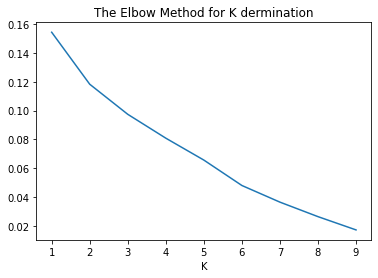

In [0]:
plt.plot(k,dist_point_from_cluster_center)
plt.title('The Elbow Method for K dermination')
plt.xlabel('K')

In [0]:
# set number of clusters
kclusters = 6
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 4, 5, 3, 0, 3, 5, 4, 2, 1, 3, 0, 3], dtype=int32)

In [0]:
neighborhoods_venues_sorted=neighborhoods_venues_sorted.merge(toronto_vnum[toronto_vnum.Num_Venues>50],on='Neighborhood')

In [0]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted
toronto_merged = df_to

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged= toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Num_Venues
0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5.0,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Cosmetics Shop,Japanese Restaurant,Café,Restaurant,Fast Food Restaurant,Italian Restaurant,Pizza Place,100.0
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Bakery,Cosmetics Shop,Diner,Beer Bar,Breakfast Spot,100.0
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.0,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Farmers Market,Beer Bar,Seafood Restaurant,Museum,56.0


In [0]:
toronto_merged = toronto_merged.drop('PostalCode', 1)


In [0]:
toronto_merged.dropna(inplace=True)

In [0]:
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

In [0]:
toronto_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Num_Venues
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Cosmetics Shop,Japanese Restaurant,Café,Restaurant,Fast Food Restaurant,Italian Restaurant,Pizza Place,100.0
2,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Bakery,Cosmetics Shop,Diner,Beer Bar,Breakfast Spot,100.0
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Farmers Market,Beer Bar,Seafood Restaurant,Museum,56.0
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Italian Restaurant,Japanese Restaurant,Burger Joint,Ice Cream Shop,Sandwich Place,Gym / Fitness Center,Department Store,Restaurant,Middle Eastern Restaurant,83.0
7,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568,3,Coffee Shop,Restaurant,Thai Restaurant,Café,Steakhouse,Bar,Lounge,Bakery,Gym,Seafood Restaurant,100.0
10,Downtown Toronto,Harbourfront East / Union Station / Toronto Is...,43.640816,-79.381752,4,Coffee Shop,Aquarium,Café,Hotel,Italian Restaurant,Restaurant,Sporting Goods Shop,Fried Chicken Joint,Brewery,Scenic Lookout,100.0
11,West Toronto,Little Portugal / Trinity,43.647927,-79.419750,1,Bar,Coffee Shop,Asian Restaurant,Restaurant,Wine Bar,Vietnamese Restaurant,Pizza Place,Men's Store,Café,Ice Cream Shop,55.0
13,Downtown Toronto,Toronto Dominion Centre / Design Exchange,43.647177,-79.381576,3,Coffee Shop,Hotel,Café,Restaurant,Seafood Restaurant,Italian Restaurant,American Restaurant,Japanese Restaurant,Gastropub,Bar,100.0
16,Downtown Toronto,Commerce Court / Victoria Hotel,43.648198,-79.379817,3,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Deli / Bodega,Japanese Restaurant,Italian Restaurant,Gastropub,100.0
30,Downtown Toronto,Kensington Market / Chinatown / Grange Park,43.653206,-79.400049,2,Bar,Café,Vietnamese Restaurant,Bakery,Vegetarian / Vegan Restaurant,Coffee Shop,Mexican Restaurant,Dumpling Restaurant,Farmers Market,Chinese Restaurant,87.0


In [0]:
toronto_merged[toronto_merged['Cluster Labels']==3]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Num_Venues
7,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568,3,Coffee Shop,Restaurant,Thai Restaurant,Café,Steakhouse,Bar,Lounge,Bakery,Gym,Seafood Restaurant,100.0
13,Downtown Toronto,Toronto Dominion Centre / Design Exchange,43.647177,-79.381576,3,Coffee Shop,Hotel,Café,Restaurant,Seafood Restaurant,Italian Restaurant,American Restaurant,Japanese Restaurant,Gastropub,Bar,100.0
16,Downtown Toronto,Commerce Court / Victoria Hotel,43.648198,-79.379817,3,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Deli / Bodega,Japanese Restaurant,Italian Restaurant,Gastropub,100.0
36,Downtown Toronto,First Canadian Place / Underground city,43.648429,-79.382280,3,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Gastropub,Steakhouse,Gym,American Restaurant,Asian Restaurant,100.0


In [0]:
toronto_merged[toronto_merged['Cluster Labels']==0]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Num_Venues
2,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Bakery,Cosmetics Shop,Diner,Beer Bar,Breakfast Spot,100.0
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Farmers Market,Beer Bar,Seafood Restaurant,Museum,56.0
34,Downtown TorontoStn A PO Boxes25 The Esplanade,Enclave of M5E,43.646435,-79.374846,0,Coffee Shop,Restaurant,Café,Seafood Restaurant,Beer Bar,Japanese Restaurant,Hotel,Breakfast Spot,Farmers Market,Creperie,95.0


### It is surprising that the unsupervised learning is able to cluster the three areas where are the top three choices (label 0) to open the Chinese restaurant

### 5.2 Visualisation with the map 

In [0]:
!conda install -c conda-forge folium --yes
import folium
import requests
import bs4
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [0]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [0]:

import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
        
map_clusters

## 6. Results and Discussion <a name="results"></a>

Our analysis fist captured the top 10 common venues in each neighbourhood which show that the neighbourhood with more than 50 venues have a coffee shop, cafe, bar and restaurant since these areas attract more tourist. While for the other neighbourhood with fewer venues for instance 'Parkdale,Roncesvalles' has the book shop and movie theatre as the top venue category. Although there is about 15% area do not have any restaurant, these places have not enough venues to attract tourists therefore they are not the ideal place to open a Chinese restaurant. While there is 74% neighbourhood in Central Toronto do not have the Chinese restaurant does not mean we have a lot of options. Because the areas that do not have Chinese restaurant may have similar Asian restaurant which increases the competition as well. Finally, we were able to find among the neighbourhood that with more than 50 venues, 'Enclave of M5E' and 'Berczy Park' do not have any Asian restaurant or Chinese Restaurants; 'St. James Town' and 'Commerce Court / Victoria Hotel' only have one Asian restaurant. After calculating the density(number of restaurant/number of venue), "Enclave of M5E" would be a better choice since it has a relatively high number of venues and low restaurant density. 

Unsupervised learning (KMeans) was then conducted to cluster the neighbourhood with the venues more than 50. The aim was to find the other potential locations similar to the three places based on the category of the venues. It turns out the algorithm clusters 'Enclave of M5E', 'Berczy Park' and 'St. James Town' together (with label 0) which are happened to be the three choices to open a Chinese restaurant based on the previous analysis. 

At last, the clustered results are shown by the map. It is interesting that a similar neighbourhood is located close to each other. The neighbourhood with the label 3 (Cyan) located in the middle of the central Toronto while the revealed three potential choices with label 0(red) are located at the east side. It is understandable that the venues distributed in each neighbourhood are highly related to their locations.   

The results, of course, does not imply that those zones are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide information on areas in the Toronto centre but not crowded with existing restaurants (particularly Chinese or Asian restaurants). The recommended zones should, therefore, be considered only as a starting point. A more detailed analysis should be conducted to find the location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met. For instance: 1) The spot should have the visibility and accessibility to make sure the restaurant can be seen by those driving or walking by. 2) Ensure the target market of your restaurant matches the demographics of the area. 3) To consider the leasing and labour cost.